In [1]:
import numpy as np
import pyvisa as visa
import time
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
rm = visa.ResourceManager()

In [3]:
rm.list_resources()

('USB0::0x0699::0x0368::C017060::INSTR',
 'USB0::0xF4ED::0xEE3A::SDG100E4140265::INSTR',
 'ASRL1::INSTR',
 'ASRL10::INSTR')

In [4]:
resource_name_f=   'USB0::0xF4ED::0xEE3A::SDG100E4140265::INSTR'
resource_name_o = 'USB0::0x0699::0x0368::C017060::INSTR'

osci = rm.open_resource(resource_name_o)
fungen = rm.open_resource(resource_name_f,read_termination="\n")

In [11]:
#def barrido_f(f_min,f_max,n,folder,scale='lin'):
#    if scale == 'log':
#        freqs = np.logspace(f_min,f_max,n)
#    elif scale == 'lin':
#        freqs = np.linspace(f_min,f_max,n)
#    else:
#        print('Escala inválida')
#        return
#    time_s = time.time()
#    for freq in freqs:
#        fungen.write(f'SOURCE1:FREQ {freq}')
#        time.sleep(1)
#        osci.write('AUTOS exec')
#        time.sleep(6)
#        osci.write('DAT:SOU CH1')
#        xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
#        
#        osci.write('ACQ:STATE STOP')
#        yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
#        osci.write('DAT:SOU CH2')
#        yze2, ymu2, yoff2 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
#        
#        osci.write('DAT:ENC RPB')
#        osci.write('DAT:WID 1')
#        
#        osci.write("DAT:SOU CH1")
#        data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)
#        osci.write("DAT:SOU CH2")
#        data2 = osci.query_binary_values('CURV?', datatype='B', container=np.array)
#        tiempo = xze + np.arange(len(data1)) * xin
#        data1v = (data1 - yoff1) * ymu1 + yze1
#        data2v = (data2 - yoff2) * ymu2 + yze2
#
#        osci.write('ACQ:STATE RUN')
#        
#        df = pd.DataFrame({'t':tiempo,'V_out':data1v,'V_R':data2v})
#        plt.plot(df.t,df.V_out)
#        plt.plot(df.t,df.V_R)
#        plt.grid()
#        plt.show()
#        df.to_csv(f'plots seke/faraday/{folder}/{np.round(freq,0)}.csv',index=False)

In [5]:
def barrido_f(f_min,f_max,n,folder,scale='lin'):
    if scale == 'log':
        freqs = np.logspace(f_min,f_max,n)
    elif scale == 'lin':
        freqs = np.linspace(f_min,f_max,n)
    else:
        print('Escala inválida')
        return
    time_s = time.time()
    for freq in freqs:
        fungen.write(f'C1:BSWV FRQ,{str(freq)}')
        time.sleep(1)
        osci.write('AUTOS exec')
        time.sleep(6)
        osci.write('DAT:SOU CH1')
        xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
        
        osci.write('ACQ:STATE STOP')
        yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
        osci.write('DAT:SOU CH2')
        yze2, ymu2, yoff2 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
        
        osci.write('DAT:ENC RPB')
        osci.write('DAT:WID 1')
        
        osci.write("DAT:SOU CH1")
        data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)
        osci.write("DAT:SOU CH2")
        data2 = osci.query_binary_values('CURV?', datatype='B', container=np.array)
        tiempo = xze + np.arange(len(data1)) * xin
        data1v = (data1 - yoff1) * ymu1 + yze1
        data2v = (data2 - yoff2) * ymu2 + yze2

        osci.write('ACQ:STATE RUN')
        
        df = pd.DataFrame({'t':tiempo,'V_out':data1v,'V_R':data2v})
        plt.plot(df.t,df.V_out)
        plt.plot(df.t,df.V_R)
        plt.grid()
        plt.show()
        df.to_csv(f'plots seke/faraday/{folder}/{np.round(freq,0)}.csv',index=False)

In [17]:
def barrido_v(v_min,v_max,n,folder,scale='lin'):
    if scale == 'log':
        volts = np.logspace(v_min,v_max,n)
    elif scale == 'lin':
        volts = np.linspace(v_min,v_max,n)
    else:
        print('Escala inválida')
        return
    time_s = time.time()
    for volt in volts:
        fungen.write(f'C1:BSWV AMP,{volt}')
        time.sleep(1)
        osci.write('AUTOS exec')
        time.sleep(6)
        osci.write('DAT:SOU CH1')
        xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
        
        osci.write('ACQ:STATE STOP')
        yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
        osci.write('DAT:SOU CH2')
        yze2, ymu2, yoff2 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
        
        osci.write('DAT:ENC RPB')
        osci.write('DAT:WID 1')
        
        osci.write("DAT:SOU CH1")
        data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)
        osci.write("DAT:SOU CH2")
        data2 = osci.query_binary_values('CURV?', datatype='B', container=np.array)
        tiempo = xze + np.arange(len(data1)) * xin
        data1v = (data1 - yoff1) * ymu1 + yze1
        data2v = (data2 - yoff2) * ymu2 + yze2

        osci.write('ACQ:STATE RUN')
        
        df = pd.DataFrame({'t':tiempo,'V_out':data1v,'V_R':data2v})
        plt.plot(df.t,df.V_out)
        plt.plot(df.t,df.V_R)
        plt.grid()
        plt.show()
        df.to_csv(f'plots seke/faraday/{folder}/{np.round(volt,1)}.csv',index=False)

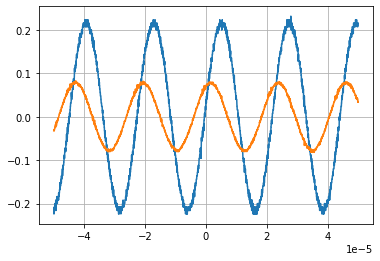

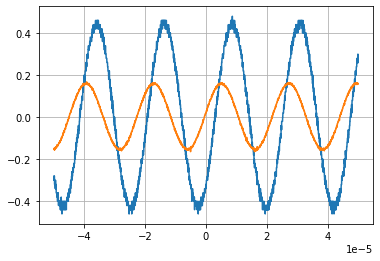

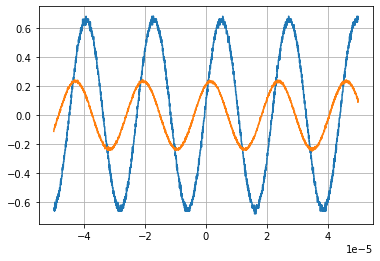

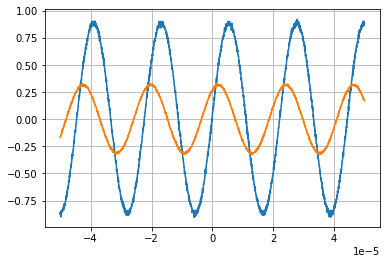

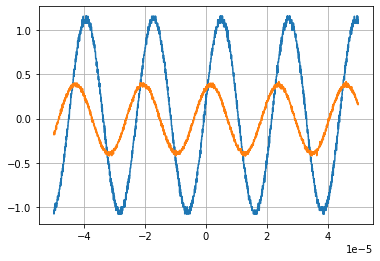

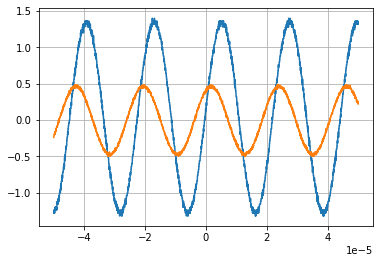

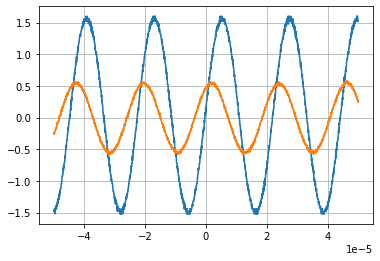

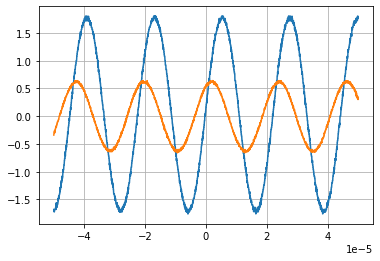

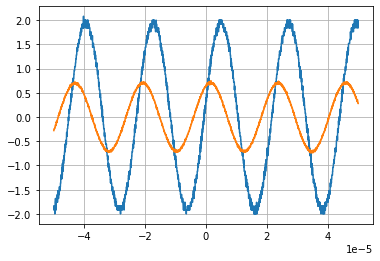

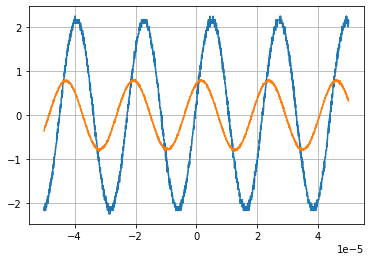

In [19]:
barrido_v(0.5,5,10,'hierro/volts')

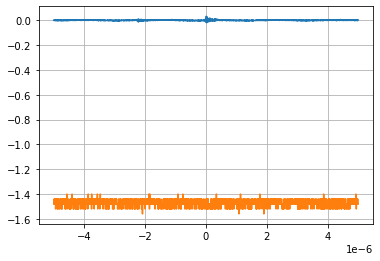

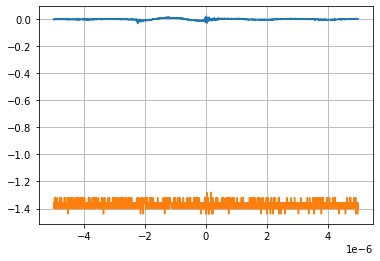

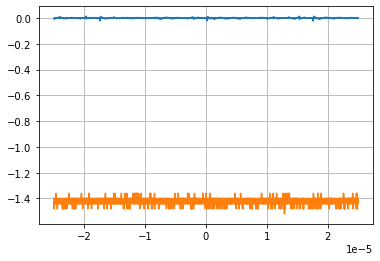

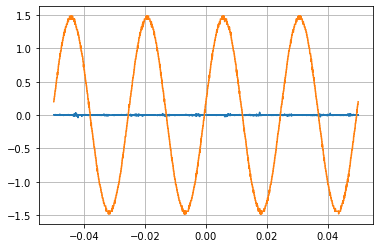

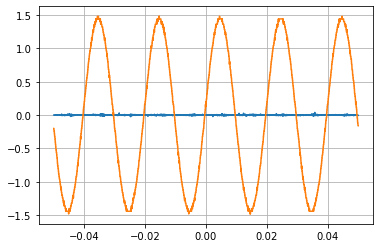

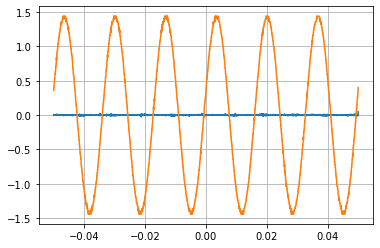

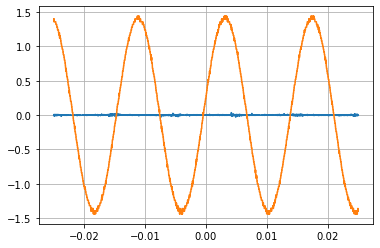

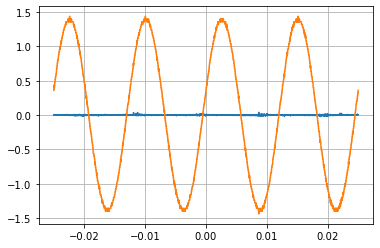

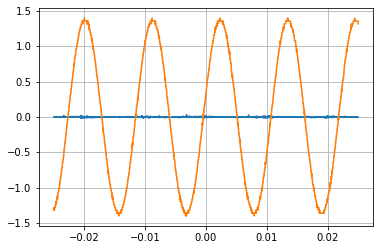

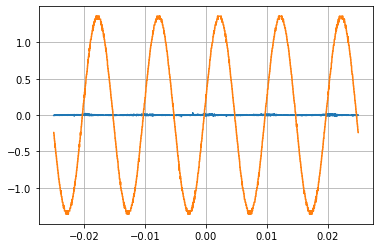

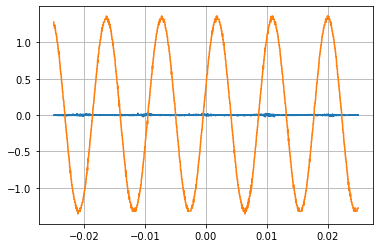

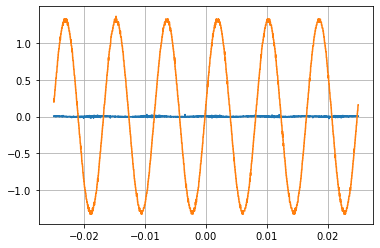

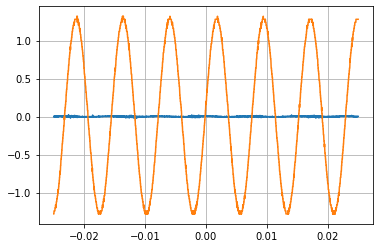

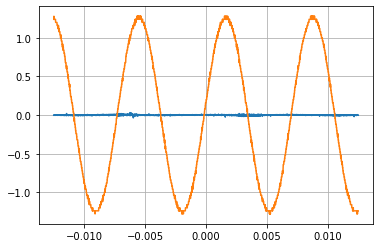

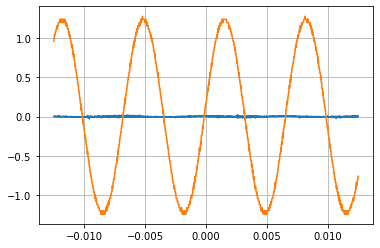

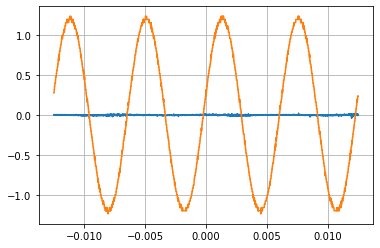

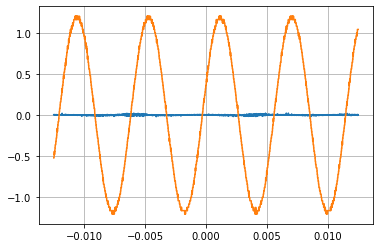

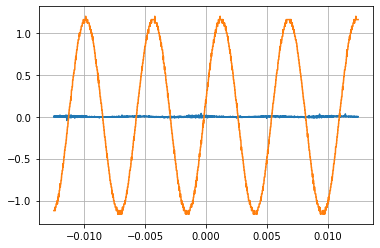

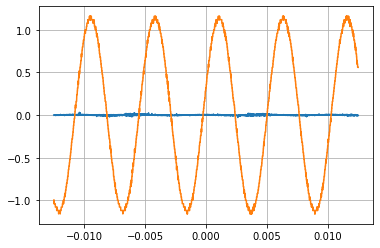

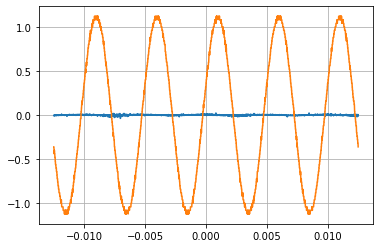

In [27]:
barrido_f(10,200,20,'transformador/pruebas/sin')